<a href="https://colab.research.google.com/github/BartekFranczak/CPO---MEL/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 

uploaded = files.upload()

Saving img.zip to img.zip


In [3]:
from zipfile import ZipFile

file_name = '/content/img.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()


In [14]:
import os 

path = '/content/img'
im_names = os.listdir(path)
im_paths = [os.path.join(path,name) for name in im_names]

im_types =[]
#circle - 0, rectangle - 1
for name in im_names:
  if 'cric' in name:
    im_types.append(0)
  else:
    im_types.append(1)


[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
['cric38_1.jpg', 'rect23_0.jpg', 'rect29_0.jpg', 'rect38_0.jpg', 'cric37_1.jpg', 'rect46_1.jpg', 'rect20_1.jpg', 'cric31_1.jpg', 'rect28_0.jpg', 'rect48_0.jpg', 'rect3_0.jpg', 'cric26_0.jpg', 'rect12_0.jpg', 'rect39_0.jpg', 'rect0_1.jpg', 'cric44_1.jpg', 'cric30_0.jpg', 'cric17_0.jpg', 'rect31_1.jpg', 'cric36_0.jpg', 'cric33_1.jpg', 'cric11_0.jpg', 'cric2_0.jpg', 'rect34_1.jpg', 'cric5_1.jpg', 'rect30_0.jpg', 'cric7_0.jpg', 'rect44_0.jpg', 'cric29_0.jpg', 'rect19_0.jpg', 'cric40_0.jpg', 'cric47_0.jpg', 'rect9_0.jpg', 'cric49_0.jpg', 'rect40_1.jpg', 'cric16_1.jpg', 'rect2_0.jpg', 'rect45_1.jpg', 'rect24_0.jpg', 'cric15_0.jpg', 'cric32_0.jpg', 'rect15_0.jpg', 'rect47_1.jpg', 'rect21_1.jpg', '

In [28]:
import numpy as np
def get_treshold(im):
  
  T = np.mean(im)
  while(1):
    higher = im.copy() 
    lower = im.copy()
    
    higher[higher<T]=0
    lower[lower>=T]=0

    N_h = np.count_nonzero(higher)
    N_l = np.count_nonzero(lower)

    mean_h = np.sum(higher)/N_h
    mean_l = np.sum(lower)/N_l

    T1 = (mean_h + mean_l)/2

    if (T1-T)<1:
      T = int(T1)
      break
    else: 
      T = int(T1)
  
  return T


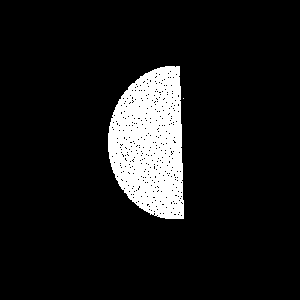

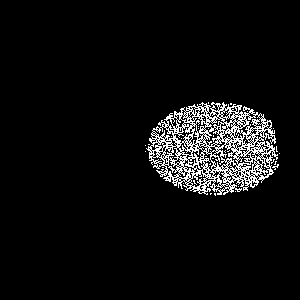

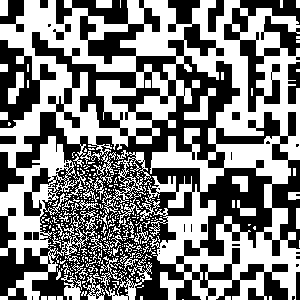

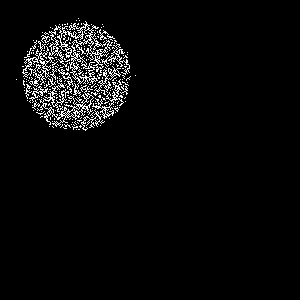

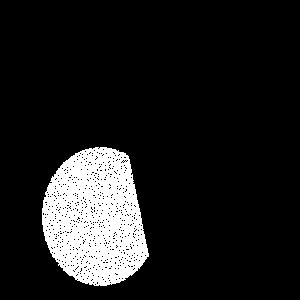

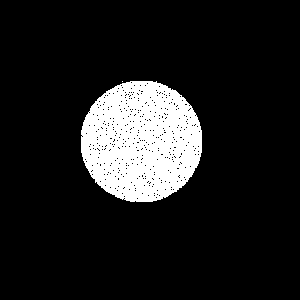

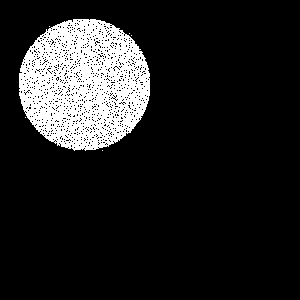

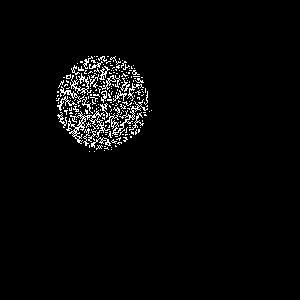

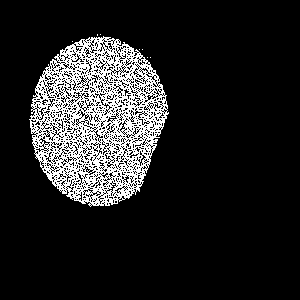

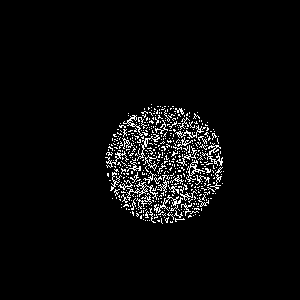

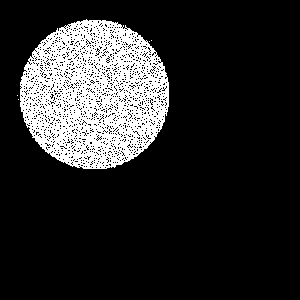

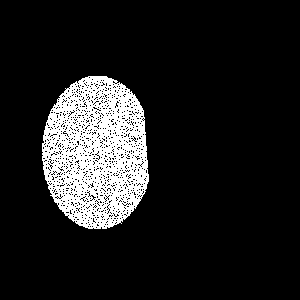

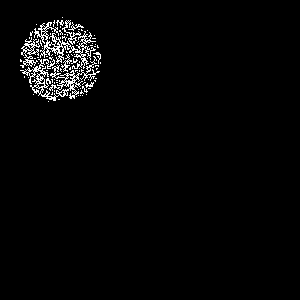

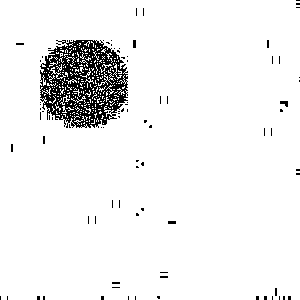

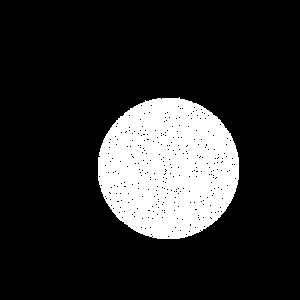

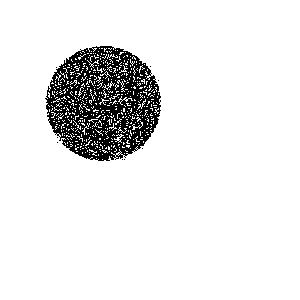

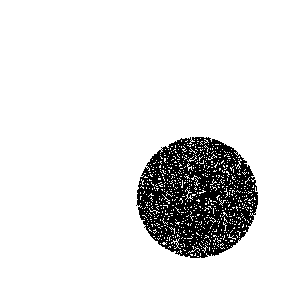

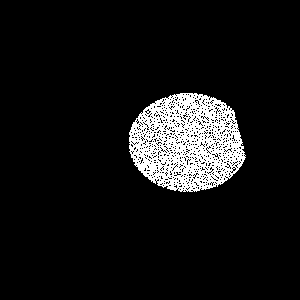

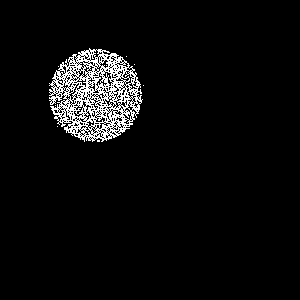

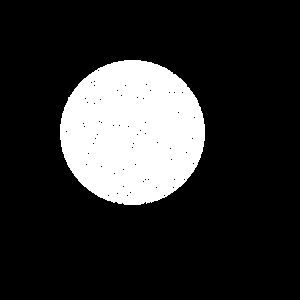

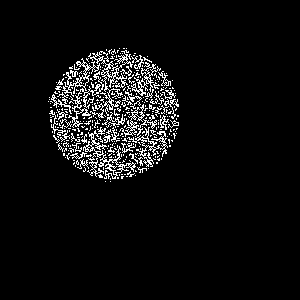

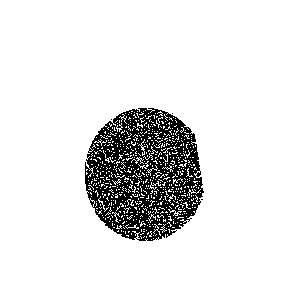

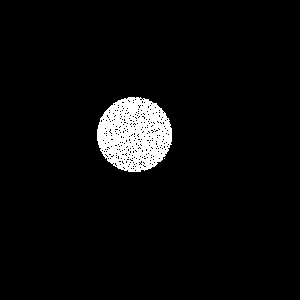

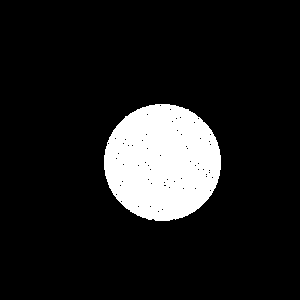

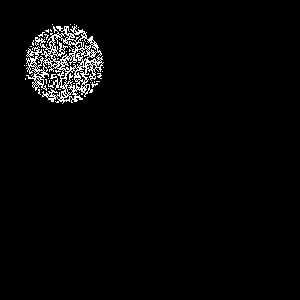

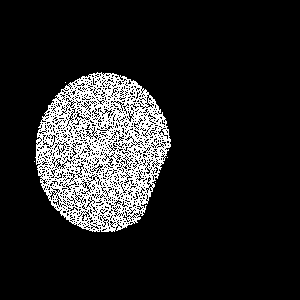

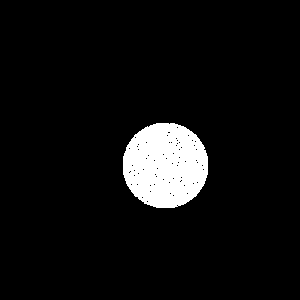

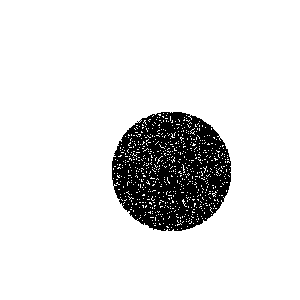

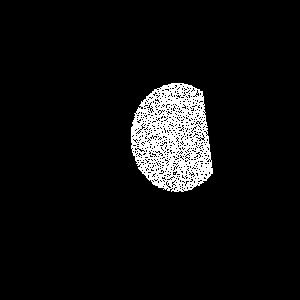

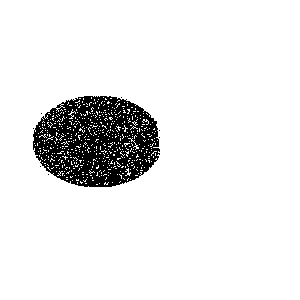

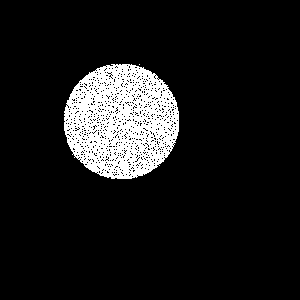

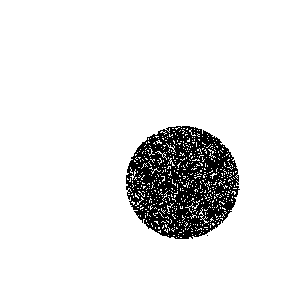

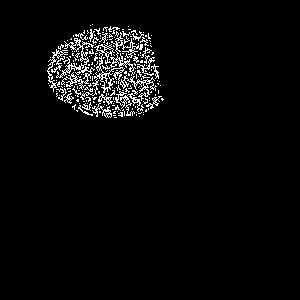

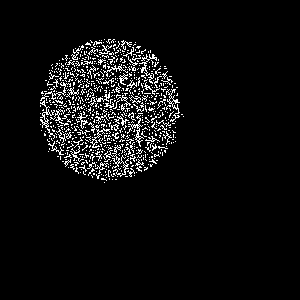

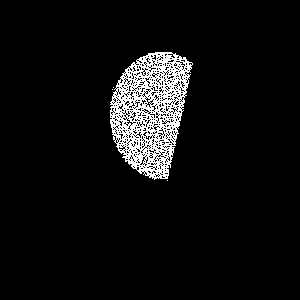

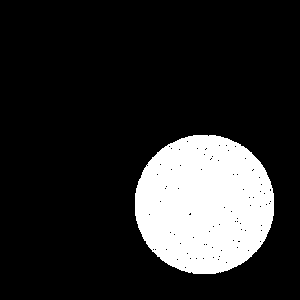

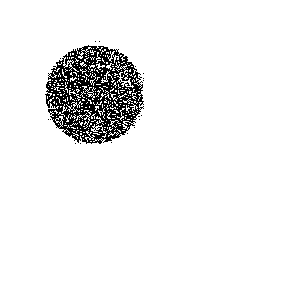

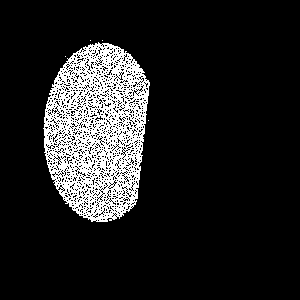

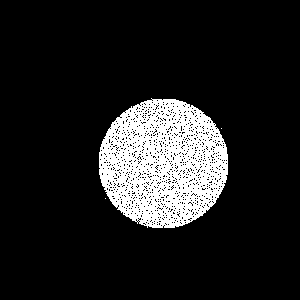

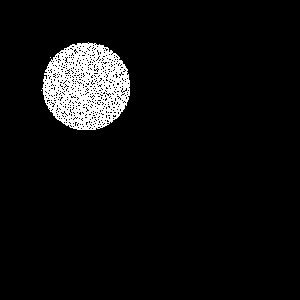

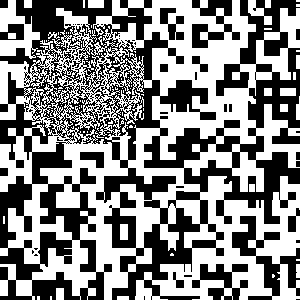

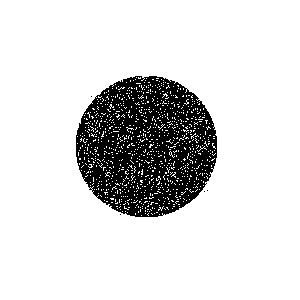

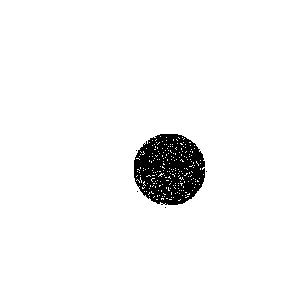

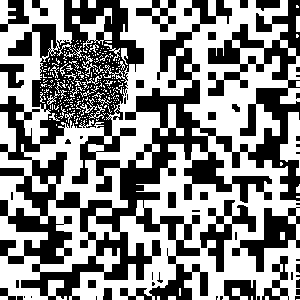

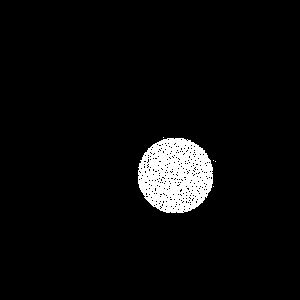

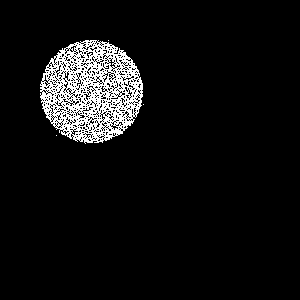

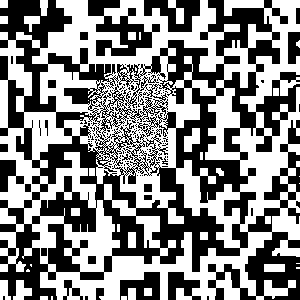

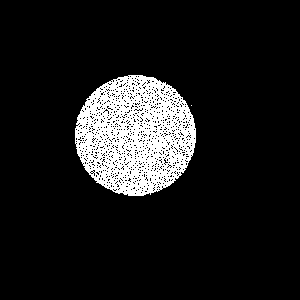

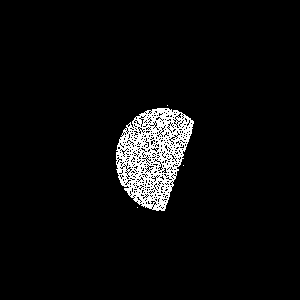

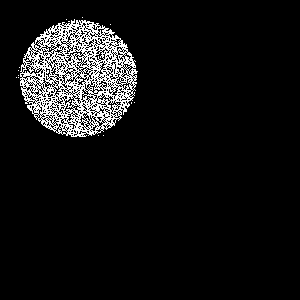

In [52]:
import cv2
from google.colab.patches import cv2_imshow
for i in range(len(im_names)):
  if im_types[i]==0:
    
    im = cv2.imread(im_paths[i],0)

    threshold = get_treshold(im)

    im[im>threshold] = 255
    im[im<=threshold] = 0

    cv2_imshow(im)

Problemy:
1. kolor obiektu raz jasny raz ciemny
2. Nieregularny kształt obiektu
3.